# 1. Data Generation

In [20]:
X= [0,1,2,3,4,5,6,7,8,9]
Y= [1,1,2,4,5,7,8,9,9,10]

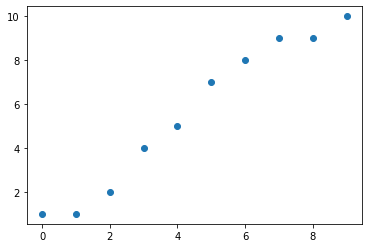

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

# 2. Hypothesis Define (Model Define)

In [22]:
class H():
    def __init__(self,w):
        self.w=w
    def forward(self,x):
        return self.w*x

In [23]:
h = H(4) # y = 4x
pred_y = h.forward(5) # x=5
print('value of f(5) :',pred_y)
print('value of w :', h.w)

value of f(5) : 20
value of w : 4


# 3. Cost Function Define (Loss Function Define)

In [24]:
def cost(h,X,Y):
    error =0
    for i in range(len(X)):
        error += (h.forward(X[i])-Y[i])**2
    error = error/len(X)
    return error

In [25]:
h = H(4)
print('cost value when w=4 :', cost(h,X,Y))

cost value when w=4 : 222.2


In [26]:
def better_cost(pred_y, true_y):
    error =0
    for i in range(len(X)):
        error += (pred_y[i]-true_y[i])**2
    error = error/len(X)
    return error

In [27]:
pred_y = [h.forward(X[i]) for i in  range(len(X))]
print('cost value when w=4 with better code structure:', better_cost(pred_y,Y))

cost value when w=4 with better code structure: 222.2


### Cost Surface Visualization

In [28]:
list_w = []
list_c = []

for i in range(-20, 20):
    w = i*0.5
    h = H(w)
    c = cost(h,X,Y)
    list_w.append(w)
    list_c.append(c)

print(list_w)
print(list_c)

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


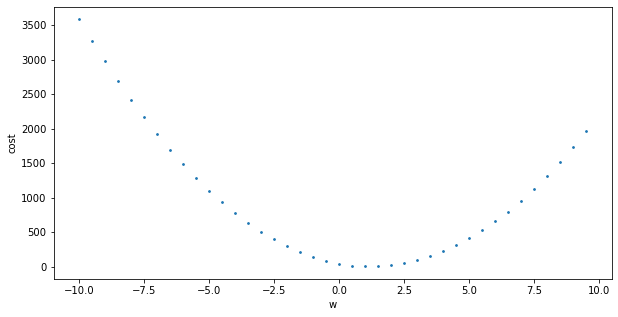

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w,list_c, s=3) #s=3 is size of dot

# 4. Gradient Descent Algorithm

In [33]:
def cal_grad(w, cost): # 수치해석적 그라디언트 근사
    h=H(w)
    cost1 = cost(h,X,Y)
    
    eps = 0.00001

    h=H(w+eps)
    cost2 = cost(h,X,Y)
    
    dcost=cost2-cost1
    dw = eps
    grad = dcost/dw
    return grad, (cost1+cost2)/2

In [35]:
w=4
lr=0.01
for i in range(10):
    grad, mean_cost = cal_grad(w,cost)
    w-= lr*grad
    print(w, mean_cost)

2.4099971500484116 222.20079500142498
1.7262959245152274 41.44099699965416
1.4323043975399372 8.018510345652484
1.3058880409413351 1.8386925634715428
1.251529007604498 0.6960442555620926
1.2281546232699134 0.48476858343354434
1.2181036380061148 0.44570371165760025
1.2137817143426064 0.43848061686627154
1.211923287167068 0.43714506663932806
1.2111241634819545 0.4368981234023502


In [36]:
def cal_grad2(w, cost): #편미분 공식을 이용한 그라디언트 근사
    h=H(w)
    grad=0
    for i in range(len(X)):
        grad += 2*(h.forward(X[i])-Y[i])*X[i]
    grad = grad/len(X)
    c=cost(h,X,Y)
    return grad, c

In [38]:
w=4
lr=0.01
for i in range(10):
    grad2, mean_cost2 = cal_grad2(w,cost)
    w-= lr*grad2
    print(w, mean_cost2)

2.41 222.2
1.7263000000000002 41.44085000000001
1.432309 8.018483165000005
1.30589287 1.8386875372085008
1.2515339341 0.6960433256298524
1.228159591663 0.48476841090895945
1.21810862441509 0.4457036791770664
1.2137867084984888 0.4384806102798395
1.2119282846543502 0.4371450648407425
1.2111291624013707 0.43689812248905335


In [45]:
w1 = 1.4
w2 = 1.4
lr = 0.05

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad1, mean_cost1 = cal_grad(w1,cost)
    grad2, mean_cost2 = cal_grad2(w2,cost)
    w1 -= lr*grad1
    w2 -= lr*grad2
    list_w1.append(w1)
    list_c1.append(mean_cost1)
    list_w2.append(w2)
    list_c2.append(mean_cost2)

print(w1, mean_cost1, w2, mean_cost2)

179055958470.17358 9.137395335023121e+23 9.879199146895137e+25 8.127273659150879e+52


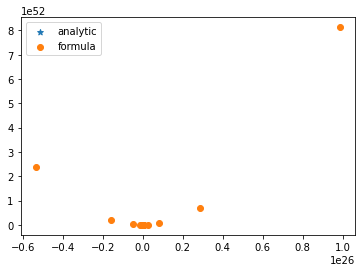

In [46]:
plt.scatter(list_w1,list_c1, label = 'analytic', marker='*')
plt.scatter(list_w2,list_c2, label = 'formula', marker='o')
plt.legend()